In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from util_out import *
from util_f1 import *
from scipy.io import loadmat, savemat
from IPython.display import Audio, display, Image, YouTubeVideo
import os
import pickle
from collections import Counter
import torch


In [2]:
GAS_FEATURE_DIR = '/jet/home/billyli/data_folder/data/googleAudioSet/pylon5/ir3l68p/kaixinm/cmu-thesis/data/audioset'
DCASE_FEATURE_DIR = '/jet/home/billyli/data_folder/data/dcase'

In [3]:
with open(os.path.join(GAS_FEATURE_DIR, 'normalizer.pkl'), 'rb') as f:
    mu, sigma = pickle.load(f, encoding='bytes')

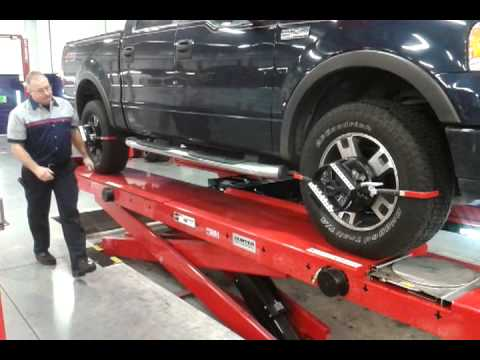

In [4]:
filename = '--BfvyPmVMo.wav'
YouTubeVideo('--BfvyPmVMo')

In [14]:
y, sr = librosa.load(filename)
# trim silent edges
hammer_sound, _ = librosa.effects.trim(y)
Audio(data=hammer_sound, rate=sr)
# print(y.shape, sr)

In [42]:
record=numpy.ma.array(y,mask=False)
# record.mask[22050:44100]=True
count = 0
for i in range(220500):
    #11025 0.5s, 5512 0.25s, 2756 0.125s
    if i % 2756 == 0:
        count +=1
    if count % 2 == 1:
        record.mask[i] = True
# print('shape:', record.shape)
# print('mask: ', Counter(record.mask))
#     mask_record = record[~record.mask]
#     print(mask_record.shape)
#     print(record.compressed().shape)
mask_record = record.filled(fill_value=0)
# mask_record = record.compressed().reshape(110250,1)
# print('masked shape: ', mask_record.shape)

# fill_matrix = numpy.full((110250,1), 0)
# print('shape', fill_matrix.shape)
# mask_record = numpy.vstack((mask_record, fill_matrix)).reshape(220500)
print(mask_record.shape)

(220500,)


In [43]:
Audio(data=mask_record, rate=sr)

(220500,)


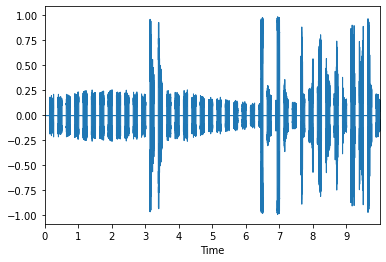

In [50]:
librosa.display.waveplot(mask_record, sr=sr);
print(mask_record.shape)

In [51]:
record=numpy.ma.array(y,mask=False)

# record.mask[22050:44100]=True
count = 0
for i in range(220500):
    if i % 11025 == 0:
        count +=1
    if count % 2 == 1:
        record.mask[i] = True
# print('shape:', record.shape)
# print('mask: ', Counter(record.mask))
#     mask_record = record[~record.mask]
#     print(mask_record.shape)
#     print(record.compressed().shape)
mask_record_concat= record.filled(fill_value=0)
mask_record_concat= record.compressed().reshape(110250,1)
print('masked shape: ', mask_record.shape)

fill_matrix = numpy.full((110250,1), 0)
print('shape', fill_matrix.shape)
mask_record_concat = numpy.vstack((mask_record_concat, fill_matrix)).reshape(220500)
print(mask_record_concat[:,].shape)

masked shape:  (220500,)
shape (110250, 1)
(220500,)


(220500,)


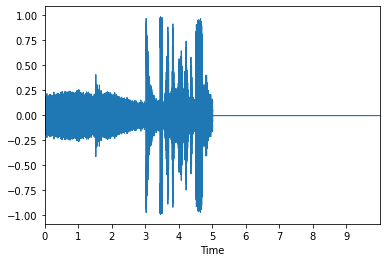

In [52]:
librosa.display.waveplot(mask_record_concat, sr=sr);
print(mask_record_concat.shape)

In [32]:
Audio(data=mask_record_concat, rate=sr)

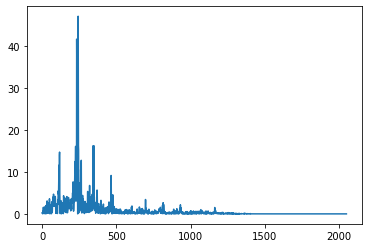

In [33]:
n_fft = 4096
D = np.abs(librosa.stft(hammer_sound[:n_fft], n_fft=n_fft, hop_length=n_fft+1))
plt.plot(D);

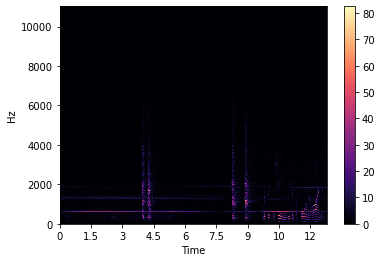

In [34]:
hop_length = 400
D = np.abs(librosa.stft(hammer_sound, n_fft=n_fft, hop_length=hop_length, win_length=1024, window='hann', center = True, pad_mode = 'constant'))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='linear');
plt.colorbar();

In [8]:
print(sr)

22050


In [30]:
def extract(wav):
    # Takes a waveform (length 160,000, sampling rate 16,000) and extracts filterbank features (size 400 * 64)
    # If the input is multiple waveforms (i.e. size n * 160,000), extract feature for each waveform (i.e. output size n * 400 * 64)
    spec = librosa.core.stft(wav, n_fft = 4096,
                             hop_length = 400, win_length = 1024,
                             window = 'hann', center = True, pad_mode = 'constant')
    mel = librosa.feature.melspectrogram(S = numpy.abs(spec), sr = 16000, n_mels = 64, fmax = 8000)
    logmel = librosa.core.power_to_db(mel[:, :400])
    return logmel.T.astype('float32')

In [47]:
y, sr = librosa.load(filename)
print(min(y), max(y))

print(mask_record .shape, sr)
# trim silent edges
hammer_sound, _ = librosa.effects.trim(y)
print('hammersound', hammer_sound.shape)
spec = librosa.core.stft(mask_record, n_fft = 4096,
                             hop_length = 480, win_length = 1024)
print('spec shape:', spec.shape)
mel = librosa.feature.melspectrogram(S = numpy.abs(spec), sr = 16000, n_mels = 64, fmax = 8000)
print('mel shape:',mel.shape)
logmel = librosa.core.power_to_db(mel[:,:400], ref=np.max)
print('logmel shape: ', logmel.T.astype('float32')
.shape)
logmel_norm = (logmel.T.astype('float32')- mu) / sigma

-0.99134934 0.9904753
(220500,) 22050
hammersound (220500,)
spec shape: (2049, 460)
mel shape: (64, 460)
logmel shape:  (400, 64)


In [48]:
print(logmel_norm)

[[-5.45438093 -5.67816589 -5.89862142 ... -4.86563212 -4.80986785
  -4.76806923]
 [-5.45438093 -5.67816589 -5.89862142 ... -4.86563212 -4.80986785
  -4.76806923]
 [-5.45438093 -5.67816589 -5.89862142 ... -4.86563212 -4.80986785
  -4.76806923]
 ...
 [-0.64223683 -0.644552   -0.98069535 ... -1.8421212  -1.78615734
  -1.55064618]
 [-0.83098241 -0.69052045 -0.82119644 ... -4.86563212 -4.80986785
  -4.73315462]
 [-0.63154199 -0.26765146 -0.21246747 ... -4.59461152 -4.67965156
  -4.62049191]]


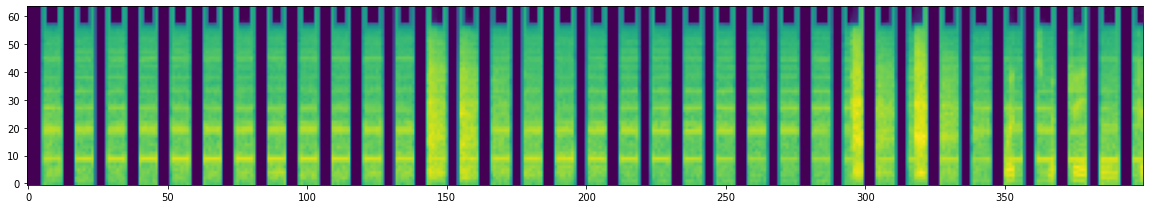

In [49]:
plt.figure(figsize = (20,10))
plt.imshow(logmel, origin='lower')

/jet/home/billyli/anaconda3/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/jet/home/billyli/anaconda3/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/jet/home/billyli/anaconda3/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


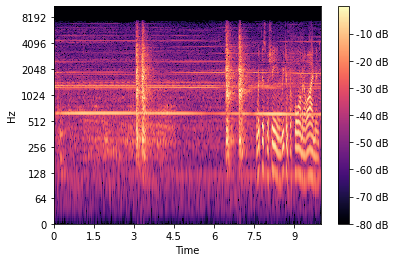

In [41]:
DB = librosa.amplitude_to_db(D, ref=np.max)
librosa.display.specshow(DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');

In [148]:
n_mels = 64
sr = 16000
mel = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mels)

(64, 552)
(64, 400)


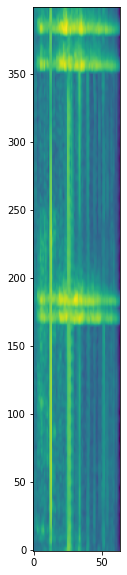

In [65]:
S = librosa.feature.melspectrogram(hammer_sound, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels,fmax = 8000)
print(S.shape)
S_DB = librosa.power_to_db(S[:,:400], ref=np.max)
print(S_DB.shape)
plt.figure(figsize=(20, 10));
plt.imshow((S_DB.T - mu) / sigma, origin='lower')
# librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time');
# plt.colorbar(format='%+2.0f dB');

In [11]:
print ([i for i in range(527) if gas_eval_y[71,i] == True])

test=gas_eval_x[101].reshape(64, 400)
librosa.display.specshow(test,y_axis='linear',x_axis='time')

NameError: name 'gas_eval_y' is not defined

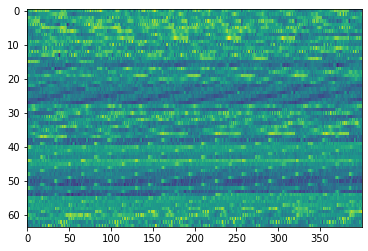

In [23]:
plt.imshow(test, interpolation='nearest', aspect='auto')

((10, 100, 527), (10, 100, 527))


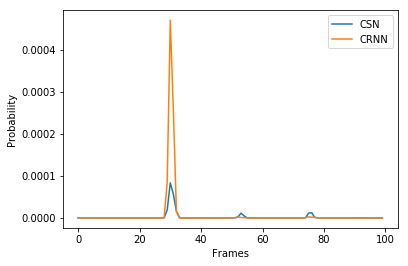

In [11]:
a = np.load('TALtransframe_516.npy')
b = np.load('TALframe_516.npy')
print (a.shape, b.shape)
line1 = plt.plot(a[0,:,516], label='CSN')
line2 = plt.plot(b[0,:,516], label='CRNN')
plt.xlabel('Frames')
plt.ylabel('Probability')
plt.legend(loc='upper right')
plt.show()

Text(0.5,0.98,'Eval set mAP vs checkpoints')

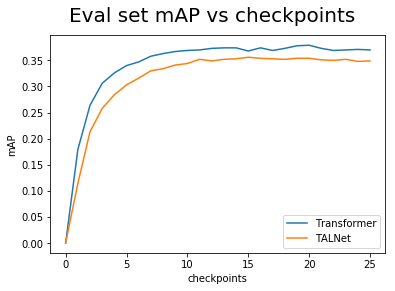

In [18]:
def parse_files(filename):
    MAP = [0.0]
    with open(filename, 'r') as f:
        for i, line in enumerate(f):
            if i < 5:
                continue
            MAP.append(float(line.split()[14]))
            if len(MAP) == 26:
                break
    return MAP
transformer = parse_files('../../workspace/audioset/TAL-trans-embed1024-10C5P-kernel3x3-bn-drop0.0-att-batch100-ckpt2500-adam-lr2e-04-pat3-fac0.8-seed15213-Trans2-weight-decay0.00000000-betas0.900-0.999dropout0.75/train.log')
#print (transformer)
TALnet = parse_files('../../workspace/audioset/embed1024-10C5P-kernel3x3-bn-drop0.0-lin-batch250-ckpt1000-adam-lr1e-03-pat3-fac0.8-seed15213/train.log')
#print (TALnet)
plt.plot(transformer, label='Transformer')
plt.plot(TALnet, label='TALNet')
plt.legend(loc='lower right')
plt.xlabel('checkpoints')
plt.ylabel('mAP')
plt.suptitle('Eval set mAP vs checkpoints', fontsize=20)


In [3]:
import timm


In [4]:
print(timm.__version__)

0.4.5


In [5]:
model = timm.create_model('vit_deit_base_distilled_patch16_384', pretrained=True)

In [13]:
original_num_patches = model.patch_embed.num_patches
print(original_num_patches)

576


In [9]:
original_hw = int(original_num_patches ** 0.5)

In [10]:
print(original_hw)

24


In [11]:
original_embedding_dim = model.pos_embed.shape[2]

In [12]:
print(original_embedding_dim)

768


In [9]:
model.blocks

ModuleList(
  (0): Block(
    (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
    (attn): Attention(
      (qkv): Linear(in_features=768, out_features=2304, bias=True)
      (attn_drop): Dropout(p=0.0, inplace=False)
      (proj): Linear(in_features=768, out_features=768, bias=True)
      (proj_drop): Dropout(p=0.0, inplace=False)
    )
    (drop_path): Identity()
    (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
    (mlp): Mlp(
      (fc1): Linear(in_features=768, out_features=3072, bias=True)
      (act): GELU()
      (fc2): Linear(in_features=3072, out_features=768, bias=True)
      (drop): Dropout(p=0.0, inplace=False)
    )
  )
  (1): Block(
    (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
    (attn): Attention(
      (qkv): Linear(in_features=768, out_features=2304, bias=True)
      (attn_drop): Dropout(p=0.0, inplace=False)
      (proj): Linear(in_features=768, out_features=768, bias=True)
      (proj_drop): Dropout(p=0.0, inplac

In [21]:
torch.sum(model.patch_embed.proj.weight, dim=1).unsqueeze(1).shape

torch.Size([768, 1, 16, 16])

In [23]:
model.patch_embed.proj.bias.shape

torch.Size([768])

In [24]:
new_proj = torch.nn.Conv2d(1, original_embedding_dim, kernel_size=(16, 16), stride=(10,10))

In [26]:
model.patch_embed.proj=new_proj 

In [27]:
print(model.patch_embed.proj)

Conv2d(1, 768, kernel_size=(16, 16), stride=(10, 10))


In [29]:
print(model.patch_embed)

PatchEmbed(
  (proj): Conv2d(1, 768, kernel_size=(16, 16), stride=(10, 10))
)


In [30]:
model.norm

LayerNorm((768,), eps=1e-06, elementwise_affine=True)